# Analyze dataset

Analyze the dataset of the Mars Express Power Challenge

## import libraries

In [30]:
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['savefig.dpi'] = 100

In [3]:
# import the helper functions: execute notebook and plot
%run ../helper/functions.ipynb

# Download and Load Data

In [5]:
INPUT_DOWNLOAD_LOCAL = False
if ('INPUT_DOWNLOAD' in globals() and INPUT_DOWNLOAD) or INPUT_DOWNLOAD_LOCAL:
    print("Downloading and loading data")
    execute_notebook("./", "load_dataset.ipynb")

power cols
NPWD2372 NPWD2401 NPWD2402 NPWD2451 NPWD2471 NPWD2472 NPWD2481 NPWD2482 NPWD2491 NPWD2501 NPWD2531 NPWD2532 NPWD2551 NPWD2552 NPWD2561 NPWD2562 NPWD2691 NPWD2692 NPWD2721 NPWD2722 NPWD2742 NPWD2771 NPWD2791 NPWD2792 NPWD2801 NPWD2802 NPWD2821 NPWD2851 NPWD2852 NPWD2871 NPWD2872 NPWD2881 NPWD2882
saaf cols
sa sx sy sz
ltdata cols
sunmars_km earthmars_km sunmarsearthangle_deg solarconstantmars eclipseduration_min occultationduration_min
dmop cols
AAA HHH MMM OOO PSF PWF SEQ SSS SXX TMB TTT VVV XXX ACF DMC DMF
CPU times: user 1min 8s, sys: 0 ns, total: 1min 8s
Wall time: 1min 8s
ftl cols
utb_ms ute_ms type flagcomms


---------------------

**Legend**
- IMLO = Interacting with Machine Learning Ontology

## IMLO2: Search for the explanatory features. 

    Status: Done

We should follow the instructions of the notebook "**notebooks/IMLO/DEM-IMLO2-Search-for-explanatory-features-json.ipynb**" for JSON or "**notebooks/IMLO/DEM-IMLO2-Search-for-explanatory-features-Gremlin.ipynb**" for Gremlin. 

And, then we should:

- Get related features X from the dataset

In the present solution, we have them in:

- saaf_cols
- ltdata_cols,
- dmop_cols
- ftl_cols

-----------------------

# Analyze data

A detailed explaination of the data is in the [Mars Express Power Challenge](https://kelvins.esa.int/mars-express-power-challenge/data/).

In this process, we also prune some rarely occuring event on the FTL files

## Power thermal

In [36]:
print("Power thermal")
X = power_all[power_cols]
print(X.head(3))

Power thermal
                     NPWD2372  NPWD2401  NPWD2402  NPWD2451  NPWD2471  \
ut_ms                                                                   
2008-08-22 00:00:00  0.133582  0.001552  0.175436  0.657240  0.000747   
2008-08-22 01:00:00  0.217001  0.001498  0.175888  0.854918  0.000717   
2008-08-22 02:00:00  0.155922  0.001503  0.175389  1.079016  0.000719   

                     NPWD2472  NPWD2481  NPWD2482  NPWD2491  NPWD2501  ...  \
ut_ms                                                                  ...   
2008-08-22 00:00:00  0.000661  0.000585  0.001927  0.244648  0.005277  ...   
2008-08-22 01:00:00  0.000628  0.000551  0.001834  0.230870  0.005010  ...   
2008-08-22 02:00:00  0.000636  0.000568  0.001856  0.202746  0.005135  ...   

                     NPWD2792  NPWD2801  NPWD2802  NPWD2821  NPWD2851  \
ut_ms                                                                   
2008-08-22 00:00:00  0.000573  0.001526  0.159719  0.005753  0.005273   
2008-08-22

In [38]:
# Getting the min and max values
power_min = X.min().min()
power_max = X.max().max()

print("power [min, max] = [", power_min, ", ", power_max, "]\n")

X.describe()

power [min, max] = [ 2e-06 ,  2.17565 ]



,NPWD2372,NPWD2401,NPWD2402,NPWD2451,NPWD2471,NPWD2472,NPWD2481,NPWD2482,NPWD2491,NPWD2501,...,NPWD2792,NPWD2801,NPWD2802,NPWD2821,NPWD2851,NPWD2852,NPWD2871,NPWD2872,NPWD2881,NPWD2882
count,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,...,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000,49125.000000
mean,0.127019,0.001916,0.175338,0.712670,0.000739,0.001243,0.002396,0.002253,0.201137,0.005294,...,0.000992,0.001536,0.134522,0.005781,0.298668,0.000528,0.000522,0.000745,0.043995,0.003374
std,0.039851,0.008065,0.001156,0.315429,0.000014,0.000581,0.022111,0.007616,0.053363,0.012247,...,0.000387,0.000030,0.078641,0.000108,0.172007,0.000078,0.000011,0.000014,0.143814,0.000066
min,0.001457,0.001411,0.034283,0.004949,0.000571,0.000613,0.000499,0.001462,0.001962,0.004884,...,0.000545,0.001179,0.002123,0.004438,0.004733,0.000494,0.000479,0.000703,0.006134,0.003156
25%,0.097174,0.001510,0.175089,0.454808,0.000731,0.000651,0.000566,0.001876,0.168675,0.005153,...,0.000581,0.001519,0.071167,0.005724,0.157778,0.000521,0.000516,0.000738,0.006683,0.003342
50%,0.121308,0.001529,0.175371,0.637445,0.000740,0.001140,0.000573,0.001899,0.198975,0.005215,...,0.000996,0.001539,0.133861,0.005793,0.304358,0.000528,0.000523,0.000747,0.006765,0.003383
75%,0.154155,0.001545,0.175606,0.972635,0.000747,0.001777,0.000578,0.001918,0.229163,0.005268,...,0.001318,0.001555,0.186622,0.005852,0.395904,0.000534,0.000528,0.000754,0.006837,0.003416
max,0.376517,0.267175,0.177803,2.175650,0.000857,0.006247,0.402500,0.306428,0.435523,1.965179,...,0.006263,0.001769,0.324555,0.006287,1.146090,0.010409,0.000598,0.000857,0.723399,0.003873


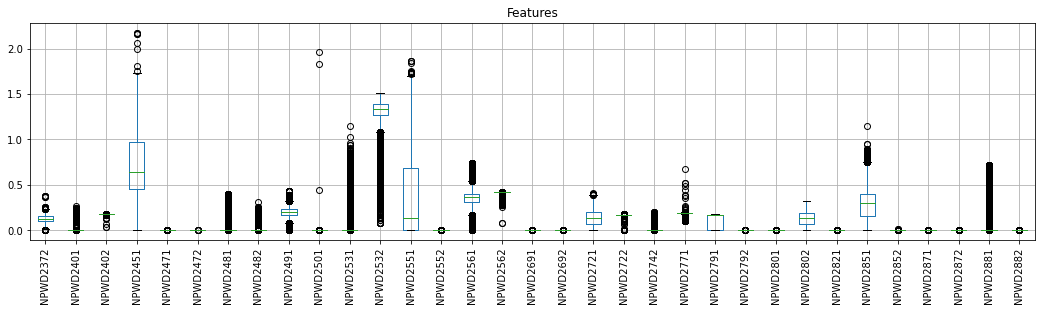

In [9]:
# Plotting the min, and max values along with the mean and standart deviation
plot_features(X)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 65613 entries, 2008-08-22 00:00:00 to 2016-02-29 23:00:00
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   NPWD2372  49125 non-null  float64
 1   NPWD2401  49125 non-null  float64
 2   NPWD2402  49125 non-null  float64
 3   NPWD2451  49125 non-null  float64
 4   NPWD2471  49125 non-null  float64
 5   NPWD2472  49125 non-null  float64
 6   NPWD2481  49125 non-null  float64
 7   NPWD2482  49125 non-null  float64
 8   NPWD2491  49125 non-null  float64
 9   NPWD2501  49125 non-null  float64
 10  NPWD2531  49125 non-null  float64
 11  NPWD2532  49125 non-null  float64
 12  NPWD2551  49125 non-null  float64
 13  NPWD2552  49125 non-null  float64
 14  NPWD2561  49125 non-null  float64
 15  NPWD2562  49125 non-null  float64
 16  NPWD2691  49125 non-null  float64
 17  NPWD2692  49125 non-null  float64
 18  NPWD2721  49125 non-null  float64
 19  NPWD2722  49125 non-null  float6

/home/cguz/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  


array([[<AxesSubplot:title={'center':'NPWD2372'}>,
        <AxesSubplot:title={'center':'NPWD2882'}>]], dtype=object)

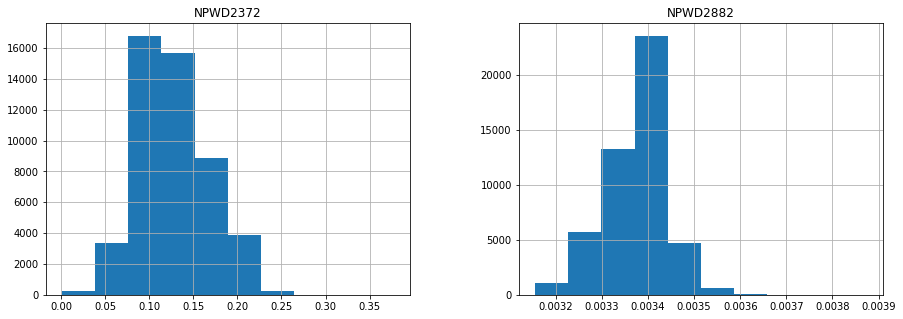

In [11]:
# Plotting histograms
test_plot = pd.DataFrame({'NPWD2372': X['NPWD2372'], 'NPWD2882' : X['NPWD2882']})
fig = plt.figure(figsize = (15,5))
ax = fig.gca()

test_plot.hist(ax = ax)

## SAAF and LTDATA

In [39]:
print("SAAF")
print(saaf_all.head(3))

SAAF
                            sa         sx         sy          sz
ut_ms                                                           
2008-08-22 00:00:00   0.339355  14.551129  90.339355  104.548871
2008-08-22 01:00:00   6.619310  18.012184  90.500460   90.396437
2008-08-22 02:00:00  30.927137  37.511806  64.618150   86.910793


In [13]:
saaf_min = saaf_all.min().min()
saaf_max = saaf_all.max().max()

print("\nsaaf [min, max] = [", saaf_min, ", ", saaf_max, "]\n")

saaf_all.describe()

saaf [min, max] = [ 0.0 ,  179.88916666666668 ]


,sa,sx,sy,sz
count,63540.000000,63540.000000,63540.000000,63540.000000
mean,6.020959,22.696546,89.797019,105.478310
std,9.886434,15.176525,7.337459,17.964464
min,0.000000,0.000000,30.791633,20.890000
25%,0.363272,10.550117,89.554167,93.322417
50%,0.949603,21.893250,89.963230,105.823095
75%,7.822676,31.483170,90.252685,118.322640
max,97.603083,90.126000,152.910000,179.889167


In [14]:
print("LTDATA")
print(ltdata_all.head(3))

,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
ut_ms,,,,,,
2008-08-22,2.419389e+08,3.557560e+08,19.565076,522.263999,4.166667,27.400000
2008-08-23,2.418002e+08,3.563037e+08,19.390075,522.863537,1.783333,26.933333
2008-08-24,2.416603e+08,3.568432e+08,19.214734,523.468926,0.000000,26.583333


In [15]:
ltdata_min = ltdata_all.min().min()
ltdata_max = ltdata_all.max().max()

print("\nltdata [min, max] = [", ltdata_min, ", ", ltdata_max, "]\n")

ltdata_all.describe()

ltdata [min, max] = [ 0.0 ,  386995787.825549 ]


,sunmars_km,earthmars_km,sunmarsearthangle_deg,solarconstantmars,eclipseduration_min,occultationduration_min
count,2.748000e+03,2.748000e+03,2748.000000,2748.000000,2748.000000,2748.000000
mean,2.289350e+08,2.726506e+08,23.191751,590.964379,16.612870,17.950194
std,1.502556e+07,8.833196e+07,12.217724,78.532924,17.576208,19.294183
min,2.066267e+08,9.238866e+07,0.280288,492.116468,0.000000,0.000000
25%,2.139482e+08,2.031328e+08,12.590296,513.955290,0.000000,0.000000
50%,2.298811e+08,2.987550e+08,24.683361,578.488823,12.266667,15.550000
75%,2.438867e+08,3.505137e+08,34.553456,667.858410,33.187500,31.700000
max,2.492395e+08,3.869958e+08,42.798354,716.025624,55.450000,87.733333


## DMOP files

In [16]:
print("DMOP")
print(dmop_all.head(3))

,AAA,HHH,MMM,OOO,PSF,PWF,SEQ,SSS,SXX,TMB,TTT,VVV,XXX,ACF,DMC,DMF
ut_ms,,,,,,,,,,,,,,,,
2008-08-22 00:00:00,4,0,0,0,0,0.0,1.0,0,0,0,0,0,3,0.0,0.0,0.0
2008-08-22 01:00:00,0,0,11,0,25,0.0,0.0,0,0,0,2,0,1,0.0,0.0,0.0
2008-08-22 02:00:00,0,0,2,0,5,0.0,0.0,0,0,0,2,0,0,0.0,0.0,0.0


In [18]:
dmop_min = dmop_all.min().min()
dmop_max = dmop_all.max().max()

print("\ndmop [min, max] = [", dmop_min, ", ", dmop_max, "]\n")

dmop_all.describe()

dmop [min, max] = [ 0.0 ,  164.0 ]


,AAA,HHH,MMM,OOO,PSF,PWF,SEQ,SSS,SXX,TMB,TTT,VVV,XXX,ACF,DMC,DMF
count,65618.000000,65618.000000,65618.00000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000,65618.000000
mean,1.864046,0.365525,1.23425,0.310662,1.571429,0.030403,0.028514,0.380368,0.076199,0.059770,0.645006,0.333003,0.099333,1.974519,0.010500,0.009967
std,5.741605,1.916104,2.81427,1.318932,5.033112,0.186910,0.181671,0.972357,0.359853,0.237127,0.909760,5.024703,0.357037,3.505698,0.132257,0.117730
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000
max,96.000000,58.000000,20.00000,14.000000,58.000000,3.000000,2.000000,12.000000,3.000000,2.000000,10.000000,164.000000,4.000000,22.000000,4.000000,2.000000


## FTL files

In [17]:
# count number of events per type
#ftl_df.sum(axis=0).sort_values()

# determine which event types occur more than 500 times
min_occ = (ftl_df.sum(axis=0) > 500)

# get their columns names
min_occ_cols = min_occ.index[min_occ.values]

# prune out from `ftl_df` the rarely occurring event types
ftl_df_sel = ftl_df[min_occ_cols]

print("FTL")
print(ftl_df.head(3))

,flagcomms,ACROSS_TRACK,D1PVMC,D2PLND,D3POCM,D4PNPO,D5PPHB,D7PLTS,D8PLTP,D9PSPO,EARTH,INERTIAL,MAINTENANCE,NADIR,NADIR_LANDER,RADIO_SCIENCE,SLEW,SPECULAR,SPOT,WARMUP
ut_ms,,,,,,,,,,,,,,,,,,,,
2008-08-22 00:00:00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2008-08-22 01:00:00,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
2008-08-22 02:00:00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0


In [18]:
ftl_min = ftl_df.min().min()
ftl_max = ftl_df.max().max()

print("\nftl [min, max] = [", ftl_min, ", ", ftl_max, "]\n")

ftl_df.describe()

ftl [min, max] = [ 0 ,  1 ]


,flagcomms,ACROSS_TRACK,D1PVMC,D2PLND,D3POCM,D4PNPO,D5PPHB,D7PLTS,D8PLTP,D9PSPO,EARTH,INERTIAL,MAINTENANCE,NADIR,NADIR_LANDER,RADIO_SCIENCE,SLEW,SPECULAR,SPOT,WARMUP
count,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000
mean,0.075046,0.028500,0.009465,0.003185,0.000671,0.096353,0.000091,0.000412,0.000152,0.003963,0.421288,0.153750,0.078491,0.060643,0.001052,0.019798,0.460701,0.001372,0.000305,0.037203
std,0.263468,0.166399,0.096825,0.056349,0.025887,0.295077,0.009562,0.020282,0.012345,0.062825,0.493769,0.360712,0.268944,0.238677,0.032412,0.139306,0.498457,0.037011,0.017456,0.189260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
ftl_df_sel.describe()

,flagcomms,ACROSS_TRACK,D1PVMC,D4PNPO,EARTH,INERTIAL,MAINTENANCE,NADIR,RADIO_SCIENCE,SLEW,WARMUP
count,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000,65613.000000
mean,0.075046,0.028500,0.009465,0.096353,0.421288,0.153750,0.078491,0.060643,0.019798,0.460701,0.037203
std,0.263468,0.166399,0.096825,0.295077,0.493769,0.360712,0.268944,0.238677,0.139306,0.498457,0.189260
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Total count on number of times each pointing time occurs in the data

In [40]:
print(ftl_df.sum(axis=0).sort_values())

D5PPHB               6
D8PLTP              10
SPOT                20
D7PLTS              27
D3POCM              44
NADIR_LANDER        69
SPECULAR            90
D2PLND             209
D9PSPO             260
D1PVMC             621
RADIO_SCIENCE     1299
ACROSS_TRACK      1870
WARMUP            2441
NADIR             3979
flagcomms         4924
MAINTENANCE       5150
D4PNPO            6322
INERTIAL         10088
EARTH            27642
SLEW             30228
dtype: int64


Inspecting the durations of pointing events

In [21]:
t_span = ftl_all['ute_ms'] - ftl_all['utb_ms']
t_span.describe()

count                        66928
mean     0 days 00:59:45.524190174
std      0 days 03:25:20.282521371
min                0 days 00:00:18
25%                0 days 00:18:40
50%                0 days 00:29:21
75%                0 days 01:10:48
max               32 days 22:00:00
dtype: object

In [42]:
# number of events lasting more than 2 hours
t_span_secs = (t_span.values * 1e-9).astype(np.int64)
more_two_hours = (t_span_secs > 2*60*60).sum()
more_two_hours / len(t_span_secs)

print((more_two_hours / len(t_span_secs)), "of the pointing events last more than 2h.")

0.10718981592158738 of the pointing events last more than 2h.


~10% of the pointing events last more than 2h. The longest event lasts 32 days.